**TODO 2:** Napraviti model linearne regresije koji predviđanja stopu mortaliteta od raka kože na osnovu geografske širine koristeći [data/skincancer.csv](data/skincancer.csv) i zatim:
1. Pronaći minimalnu i maksimalnu očekivanu stopu mortaliteta od raka kože u Novom Sadu. Nacrtati tačke na grafiku. *Koordinate Novog Sada: 45.2396° N, 19.8227° E.*
1. Da li prema regresionom modelu postoji stopa mortaliteta od raka kože na Severnom polu? Obrazloži odgovor. *Gografska sirina Servernog pola je 90° N.*

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

import line_pretpostavke as line

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../data/skincancer.csv")

In [3]:
df.head()

,State,Lat,Mort,Ocean,Long
0,Alabama,33.0,219,1,87.0
1,Arizona,34.5,160,0,112.0
2,Arkansas,35.0,170,0,92.5
3,California,37.5,182,1,119.5
4,Colorado,39.0,149,0,105.5


In [4]:
x = df['Lat']
y = df['Mort']

Text(0, 0.5, 'Mort')

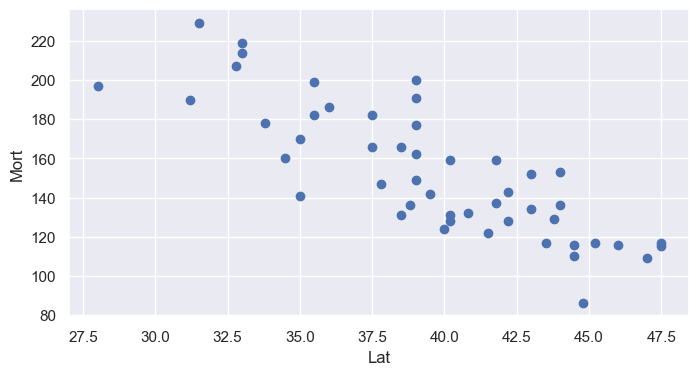

In [5]:
plt.scatter(x, y)
plt.xlabel("Lat")
plt.ylabel("Mort")

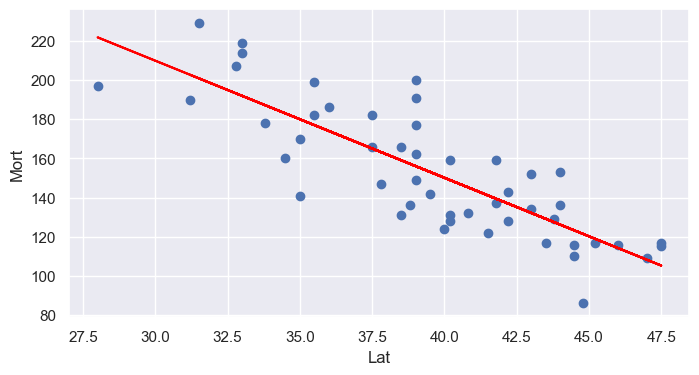

In [6]:
x_with_const = sm.add_constant(x)
model = sm.OLS(y, x_with_const).fit()
y_pred = model.predict(x_with_const)  

plt.plot(x, y_pred, color='red')
plt.scatter(x, y)
plt.xlabel("Lat")
plt.ylabel("Mort")
plt.show()

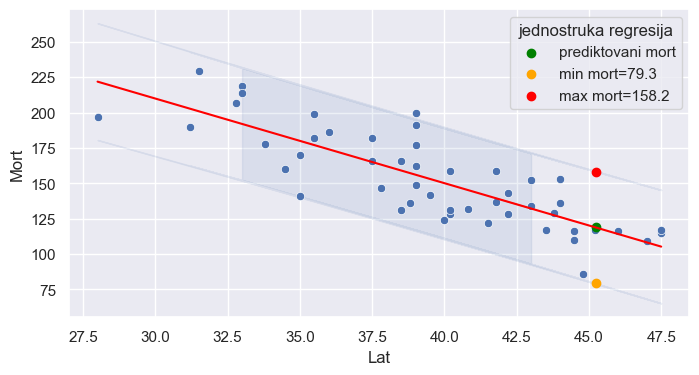

In [7]:
pred_intervals = model.get_prediction(x_with_const).summary_frame(0.05)
pred_intervals.head()

# plotuj interval predikcije
plt.fill_between(x,
                pred_intervals['obs_ci_lower'],
                pred_intervals['obs_ci_upper'],
                color='b',
                alpha=.1)


# plotuj podatke i liniju koja se nabolje uklapa (best fit)
sb.scatterplot(data=df, x='Lat', y='Mort')
sb.lineplot(data=df, x='Lat', y=y_pred, color='red')


lat = 45.2396
lat_with_const = sm.add_constant([0, lat])
pred_intervals = model.get_prediction(lat_with_const).summary_frame(0.05)

mean_y_pred = pred_intervals['mean'][1] # prosecna prediktovana
low_y_pred = pred_intervals['obs_ci_lower'][1] # min
high_y_pred = pred_intervals['obs_ci_upper'][1] # max

# plotuj interval predikcije za Novi Sad
plt.scatter(lat, mean_y_pred, c='green', label='prediktovani mort')
plt.scatter(lat, low_y_pred, c='orange', label=f'min mort={low_y_pred:.1f}')
plt.scatter(lat, high_y_pred, c='red', label=f'max mort={high_y_pred:.1f}')

plt.legend(title='jednostruka regresija')
plt.show()

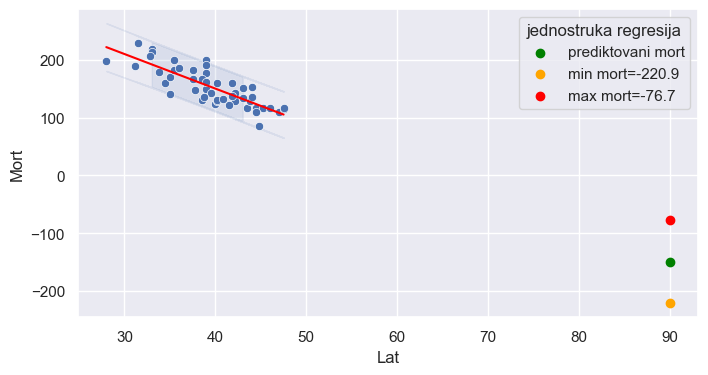

In [8]:
pred_intervals = model.get_prediction(x_with_const).summary_frame(0.05)
pred_intervals.head()

# plotuj interval predikcije
plt.fill_between(x,
                pred_intervals['obs_ci_lower'],
                pred_intervals['obs_ci_upper'],
                color='b',
                alpha=.1)


# plotuj podatke i liniju koja se nabolje uklapa (best fit)
sb.scatterplot(data=df, x='Lat', y='Mort')
sb.lineplot(data=df, x='Lat', y=y_pred, color='red')

lat = 90
lat_with_const = sm.add_constant([0, lat])
pred_intervals = model.get_prediction(lat_with_const).summary_frame(0.05)

mean_y_pred = pred_intervals['mean'][1] # prosecna prediktovana
low_y_pred = pred_intervals['obs_ci_lower'][1] # min
high_y_pred = pred_intervals['obs_ci_upper'][1] # max

# plotuj interval predikcije za Novi Sad
plt.scatter(lat, mean_y_pred, c='green', label='prediktovani mort')
plt.scatter(lat, low_y_pred, c='orange', label=f'min mort={low_y_pred:.1f}')
plt.scatter(lat, high_y_pred, c='red', label=f'max mort={high_y_pred:.1f}')

plt.legend(title='jednostruka regresija')
plt.show()

In [9]:
df["Lat"].describe()

count    49.000000
mean     39.532653
std       4.610874
min      28.000000
25%      36.000000
50%      39.500000
75%      43.000000
max      47.500000
Name: Lat, dtype: float64